In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import os
import glob
%matplotlib inline
from scipy.optimize import curve_fit
import math
import pandas as pd 
from pandas import DataFrame, read_csv

In [3]:
cd /Users/austinmcdonald/Desktop/data/NaI test/CS137/991667/1

/Users/austinmcdonald/Desktop/data/NaI test/CS137/991667/1


In [14]:
datass = None
datass = []
for files in glob.glob("*.csv"):
    datass.append(files)
filename = datass[2:len(datass)]

In [9]:
len(files)

14

In [15]:
N=len(filename)
analysis = []
Time = []
darea = []
area = []
Voltage = []
area_sqd=[]
pulseht=[]
for x in range(1,N):
    analysis.append(np.genfromtxt(filename[x],delimiter=",",skip_header=21,skip_footer=0))
for y in range(0,x):
    Time.append(analysis[y][:,0])
    Voltage.append(analysis[y][:,1])

Timeconst = Time[2][4]-Time[2][3]
for z in range(0,x):
    if (min(Voltage[z]) >= -100) and (max(Voltage[z]*Timeconst) < 100000): 
        darea.append(Voltage[z]*Timeconst) 
        pulseht.append(min(Voltage[z]))
for a in range(0,len(darea)):    
    area.append(sum(darea[a]))
Area = np.array(area)
Pulseht = np.array(pulseht)

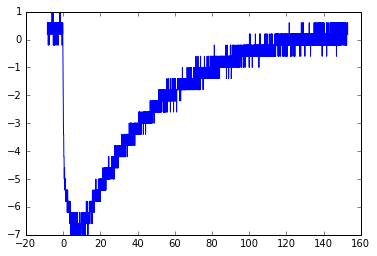

In [44]:
plt.plot(Time[4000]/1e-6,Voltage[4000])

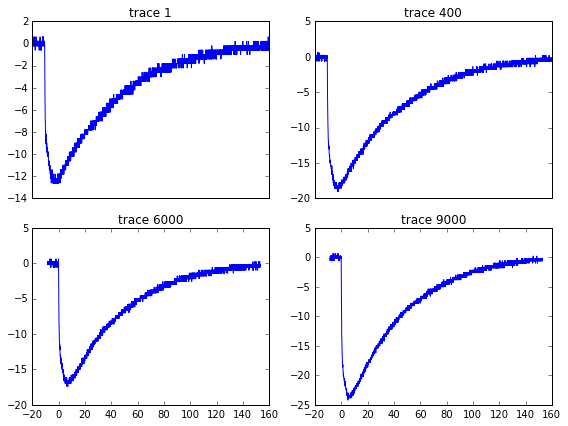

In [80]:
fig = plt.figure(figsize=(8, 6))

plt.ylabel('Voltage')
sub1 = plt.subplot(2, 2, 1)
sub1.set_xticks(())
#sub1.set_yticks(())
sub1.plot(Time[1]/1e-6,Voltage[1])
plt.title('trace 1')

sub2 = plt.subplot(2, 2, 2)
sub2.set_xticks(())
#sub2.set_yticks(())
sub2.plot(Time[400]/1e-6,Voltage[400])
plt.title('trace 400')

sub3 = plt.subplot(2, 2, 3)
#sub3.set_xticks(())
#sub3.set_yticks(())
sub3.plot(Time[6000]/1e-6,Voltage[6000])
plt.title('trace 6000')

sub4 = plt.subplot(2, 2, 4)
#sub4.set_xticks(())
#sub4.set_yticks(())
sub4.plot(Time[9000]/1e-6,Voltage[9000])
plt.title('trace 9000')

fig.tight_layout()
#plt.savefig('/Users/austinmcdonald/Desktop/traces.pdf')

plt.show()

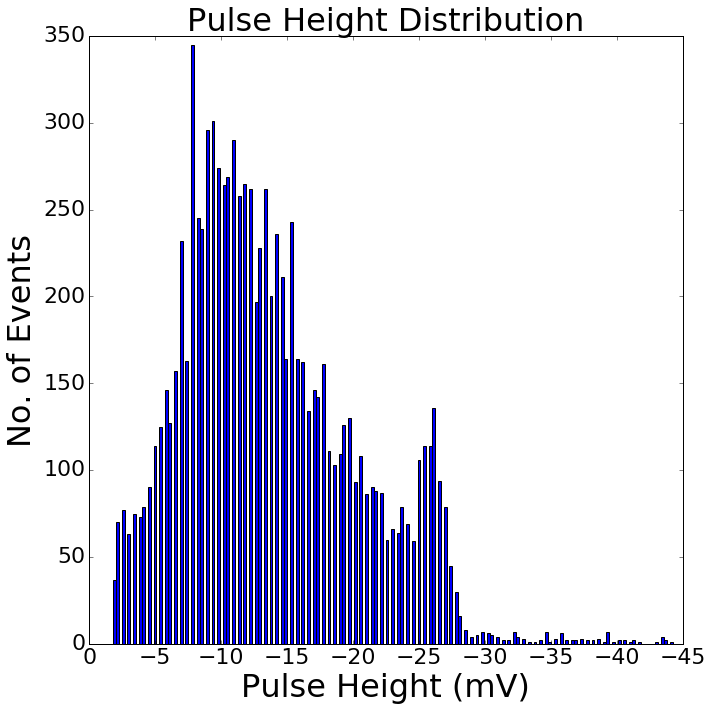

In [81]:
plt.figure(figsize=(10,10))
plt.hist(Pulseht, bins=300)
#plt.xlim([0,-35])
plt.xlabel("Pulse Height (mV)", fontsize= 32)
plt.ylabel("No. of Events", fontsize= 32)
plt.title("Pulse Height Distribution", size=32)

#plt.text(585, .25, r'$\frac{F_{max}}{F_{min}} = 291.83$', fontsize=30)
#plt.legend(loc='upper right',fontsize=26,shadow=True, fancybox=True)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.xlim(0,-45)
plt.tight_layout()
#plt.savefig('/Users/austinmcdonald/Desktop/PulseHeight.pdf')
plt.show()

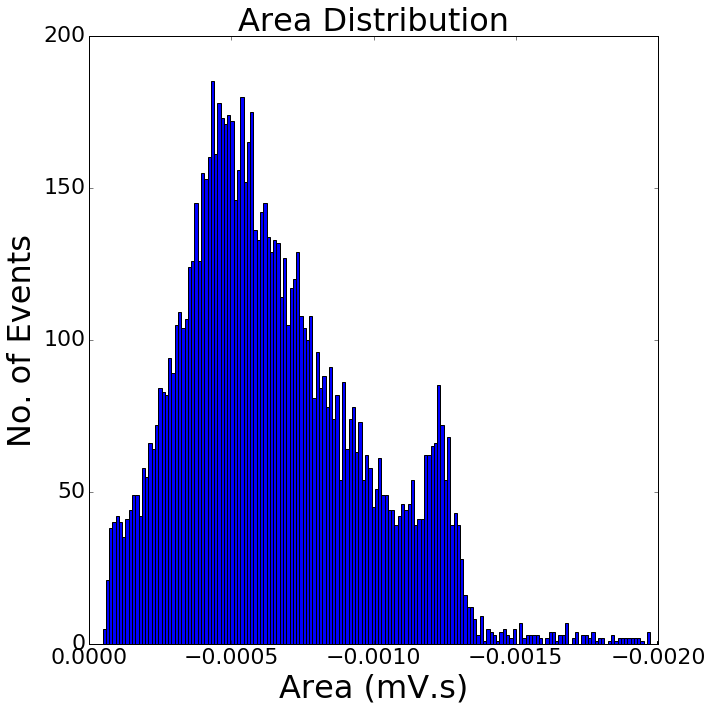

In [82]:
plt.figure(figsize=(10,10))
plt.hist(Area, bins=300)
plt.xlabel("Area (mV.s)", fontsize= 32)
plt.ylabel("No. of Events", fontsize= 32)
plt.title("Area Distribution", size=32)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.xlim(0,-.002)
plt.tight_layout()
#plt.savefig('/Users/austinmcdonald/Desktop/Areas.pdf')
plt.show()


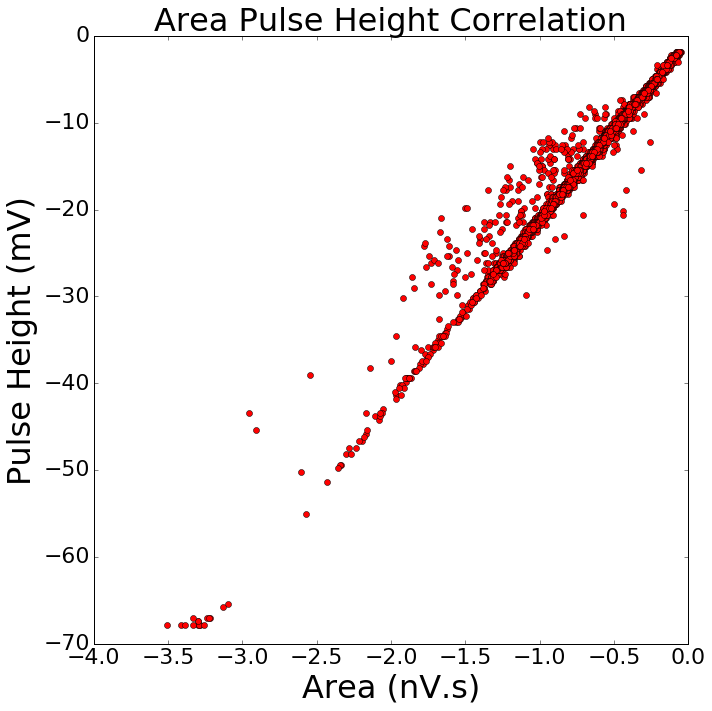

In [83]:
plt.figure(figsize=(10,10))
plt.plot(Area/1e-3,Pulseht, 'ro')
plt.xlabel("Area (nV.s)", fontsize= 32)
plt.ylabel("Pulse Height (mV)", fontsize= 32)
plt.title("Area Pulse Height Correlation", size=32)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.tight_layout()
#plt.savefig('/Users/austinmcdonald/Desktop/Correlation.pdf')

plt.show()

In [37]:
#np.savetxt("pulseht.csv",Pulseht,delimiter=',')
#np.savetxt("area1.csv", Area, delimiter=",")